# ODMR 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

---

---

## 27 Maggio - prime cose

Qui abbiamo modificato i tempi di acquisizione, in modo che matchassero quello del moku e quello del generatore di microonde. Commentare bene questa cosa!

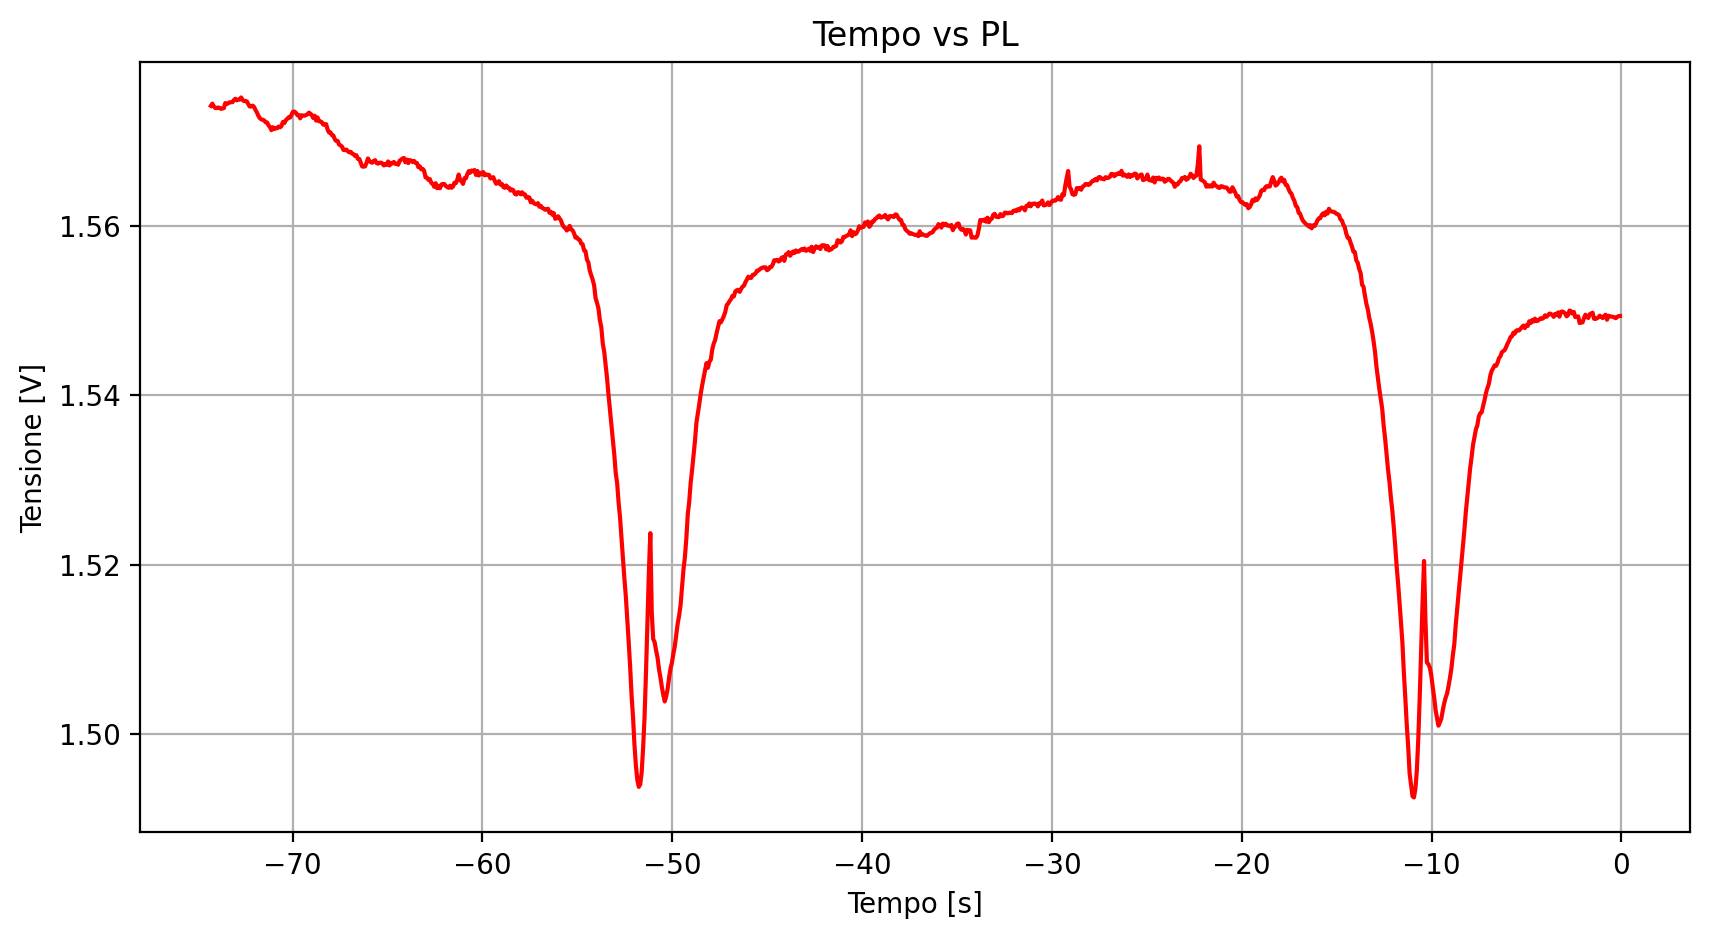

In [ ]:
data = np.loadtxt('data/2750_2950_0e15_cristallo_1.csv', skiprows=9, delimiter=',')
time = data[:, 0]  # in s
ch_A = data[:, 1]  # in V
ch_B = data[:, 2]  # in V

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.plot(time, ch_A, color='red', label='CH A')
ax.set_xlabel('Tempo [s]')
ax.set_ylabel('Tensione [V]')
ax.set_title('Tempo vs PL')
ax.grid(True)
plt.show()

Da questo è interessante estrarre il rapporto tra il deep e il backround (ODMR ratio?). Provo fittando con una gaussiana traslata su y.

In [22]:
def gauss (x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def due_gauss_traslate (x, mu1, sigma1, A1, mu2, sigma2, A2, delta_y):
    return delta_y - gauss(x, mu1, sigma1, A1) - gauss(x, mu2, sigma2, A2)

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_12698/2214401225.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(time_fit, ch_A_fit, 'b-', linewidth=1, linestyle='--', label='Fit gaussiano')


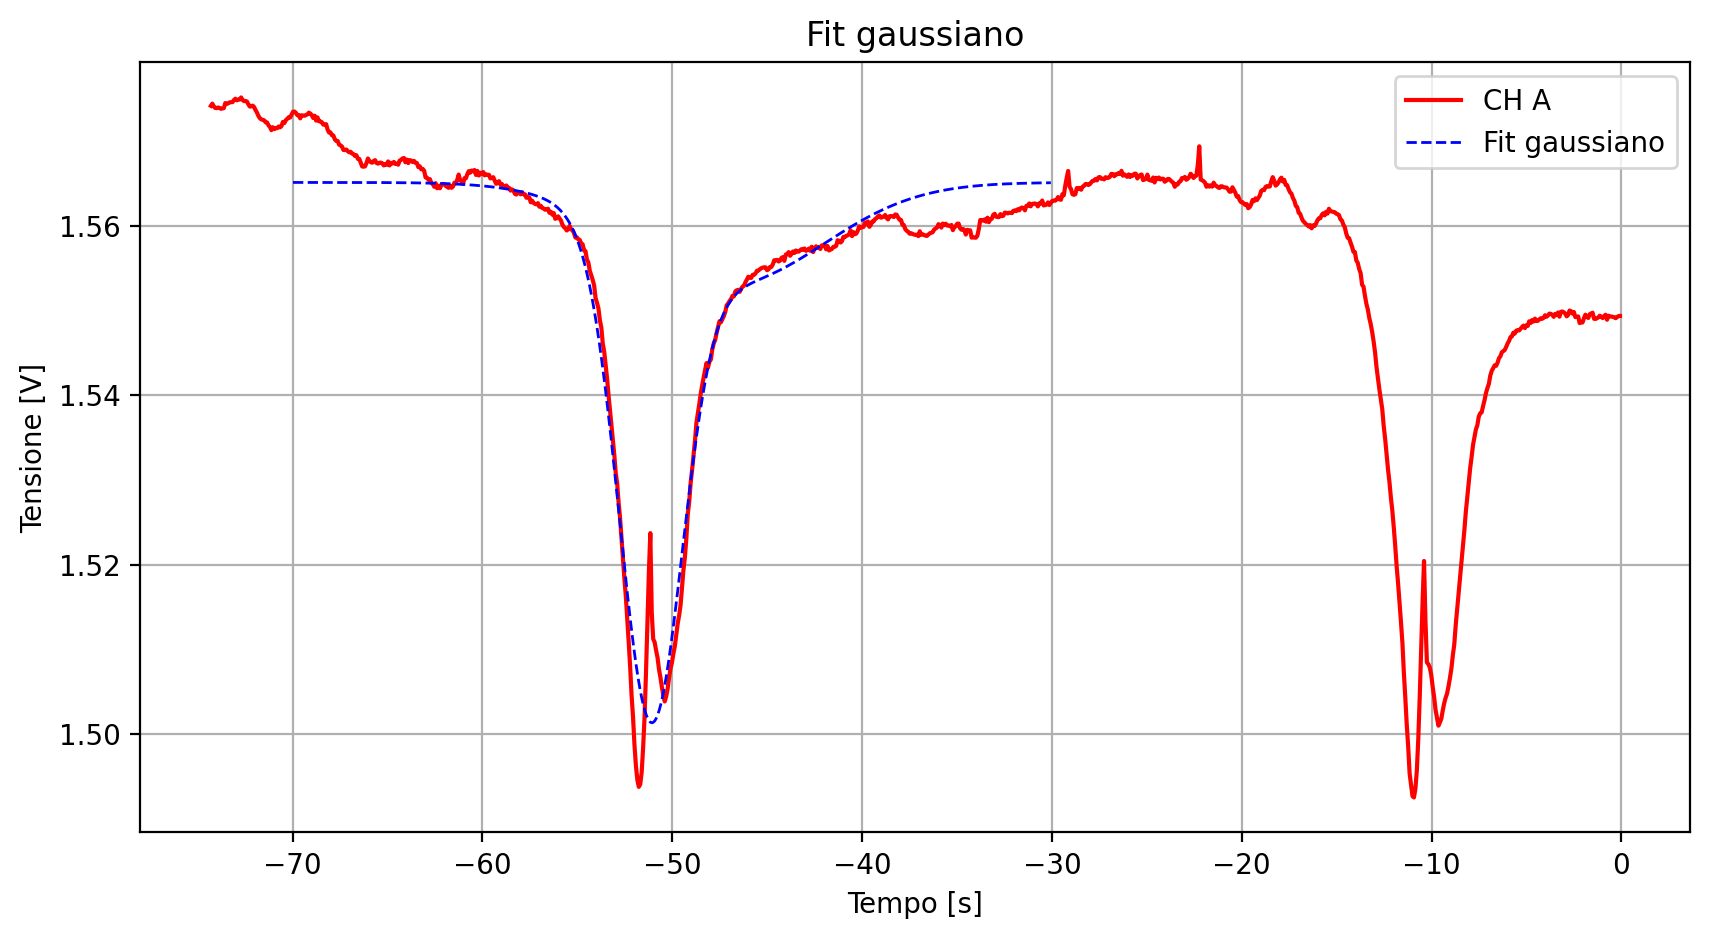

Rapporto: 0.9544
Rumore di fondo: 0.002504939255367331


In [42]:
# Seleziono la regione di interesse tra -70 e -30 secondi
mask = (time >= -70) & (time <= -30)
time_roi = time[mask]
ch_A_roi = ch_A[mask]

# Stima iniziale dei parametri
# [mu1, sigma1, A1, mu2, sigma2, A2, delta_y]
p0 =  [-52,  2,   1., -48,  2.,   1.,  1.]  
low = [-53,  0,   0., -49,  0.,   0.,  0.]
upp = [-51,  5, 100., -47,  5., 100., 10.]  

# Fit con errori
popt, pcov = curve_fit(due_gauss_traslate, time_roi, ch_A_roi, p0=p0, absolute_sigma=True, bounds=(low,upp))

# Genero punti per la curva di fit
time_fit = np.linspace(np.min(time_roi), np.max(time_roi), 1000)
ch_A_fit = due_gauss_traslate(time_fit, *popt)

# Plot dei dati e del fit
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.plot(time, ch_A, color='red', label='CH A')
ax.plot(time_fit, ch_A_fit, 'b-', linewidth=1, linestyle='--', label='Fit gaussiano')
ax.set_xlabel('Tempo [s]')
ax.set_ylabel('Tensione [V]')
ax.set_title('Fit gaussiano')
ax.grid(True)
ax.legend()
plt.show()

background = popt[-1]
deep = np.min(ch_A_roi)

ratio = deep / background

print(f"Rapporto: {ratio:.4f}")

mask = (time >= -40) & (time <= -20)
background_region = ch_A[mask]
noise = np.std(background_region)

print(f"Rumore di fondo: {noise}")

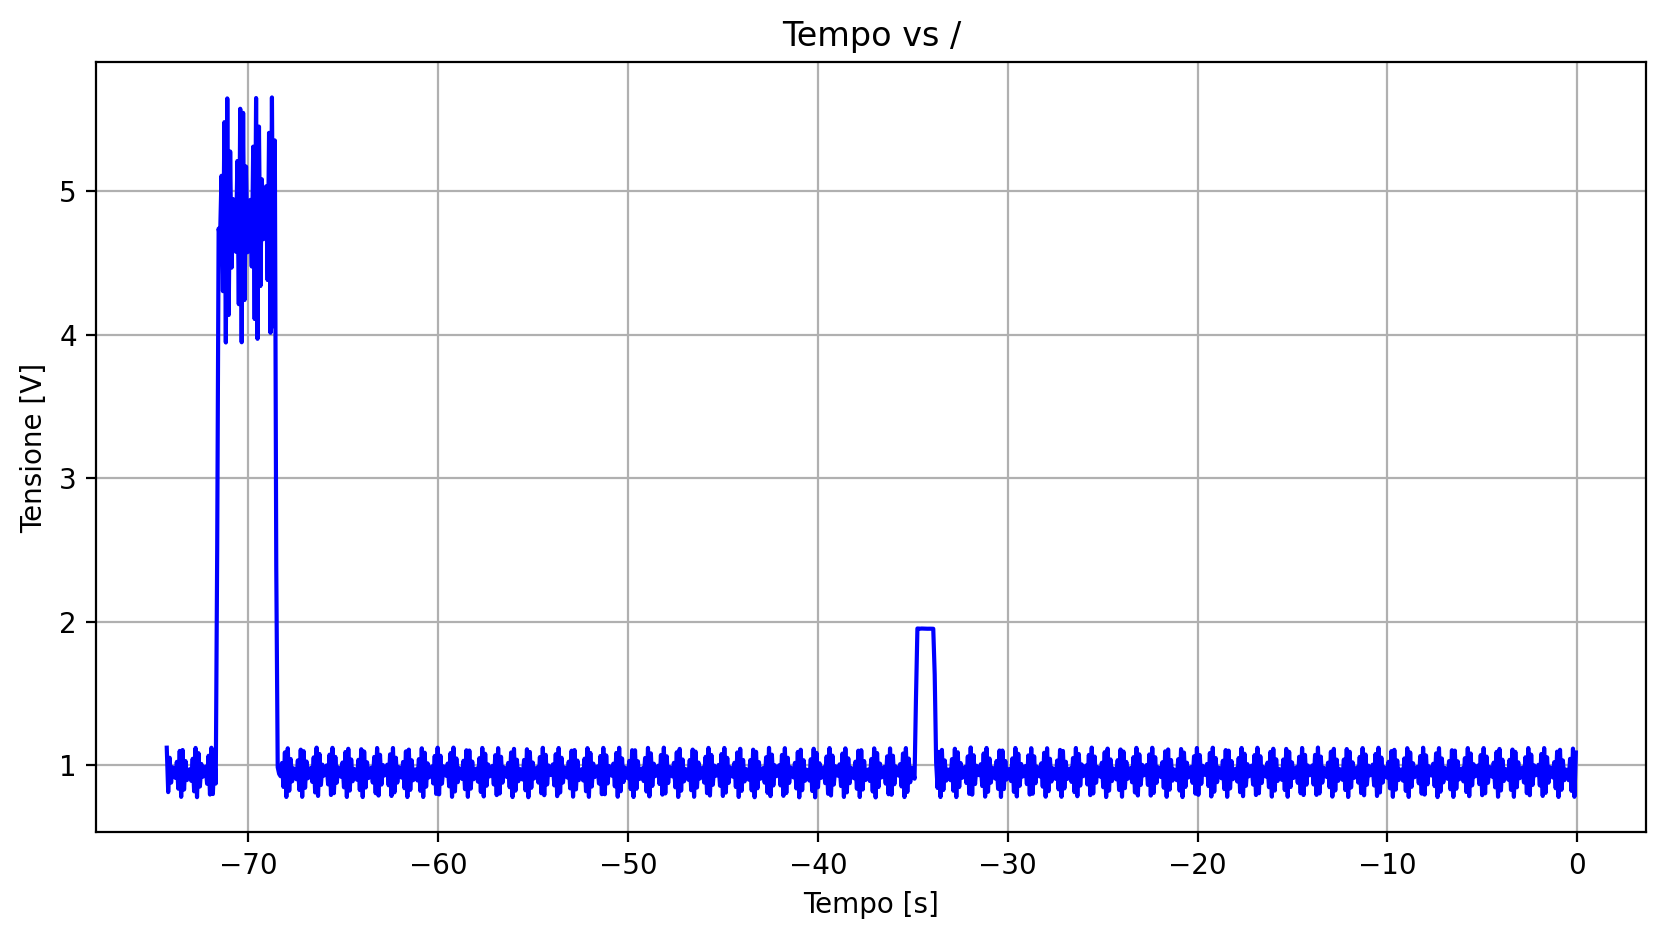

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(time, ch_B, color='blue', label='CH B')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensione [V]')
plt.title('Tempo vs /')
plt.grid(True)
plt.show()